In [1]:
from Angrybird import AngryBird
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = AngryBird()

In [3]:
trajs = []
vents = []
for j in range(10000):
    env.reset()
    for i in range(10):
        env.step(np.array([0., 0.]))
    trajs.append(np.copy(np.array(env.trajectoire)))
    vents.append(np.copy(np.array(env.vent)))
trajs = np.array(trajs)
vents = np.array(vents)

meanx = np.zeros(10)
meany = np.zeros(10)
stdx = np.zeros(10)
stdy = np.zeros(10)
for j in range(10):
    i = 10 * (j + 1)
    meanx[j] = trajs[:, i, 1].mean()
    meany[j] = trajs[:, i, 2].mean()
    stdx[j] = trajs[:, i, 1].std()
    stdy[j] = trajs[:, i, 2].std()

In [42]:
def test_coeff(coeff, display=True):
    state = env.reset()
    for i in range(10):
        if i == 0:
            state, reward, done, _ = env.step(np.array([0., 0.]))
        else:
            force = np.array([-(state[1] - meanx[i-1]) * coeff * stdx[i-1], 
                              -(state[2] - meany[i-1]) * coeff * stdy[i-1]])
            #print(force)
            state, reward, done, _ = env.step(force)
        #print(reward)
    if display:
        traj = np.array(env.trajectoire)
        plt.plot(traj[:, 1], traj[:, 2])
        plt.scatter(traj[-1][1], traj[-1][2])
        #print(traj[-10:])
    return reward

In [28]:
%%time
from tqdm.notebook import tqdm
mean_rewards = []
for l in tqdm(np.arange(0.13, 0.16, step=0.001)):
    coeff = l
    rewards = []
    for j in range(40000):
        rewards.append(test_coeff(coeff, display=False))
    mean_rewards.append([l, np.mean(rewards)])
mean_rewards = np.array(mean_rewards)
np.where(mean_rewards[:, 1] == mean_rewards[:, 1].min())[0][0]


CPU times: user 40min 50s, sys: 2.16 s, total: 40min 52s
Wall time: 40min 49s


22

<IPython.core.display.Javascript object>


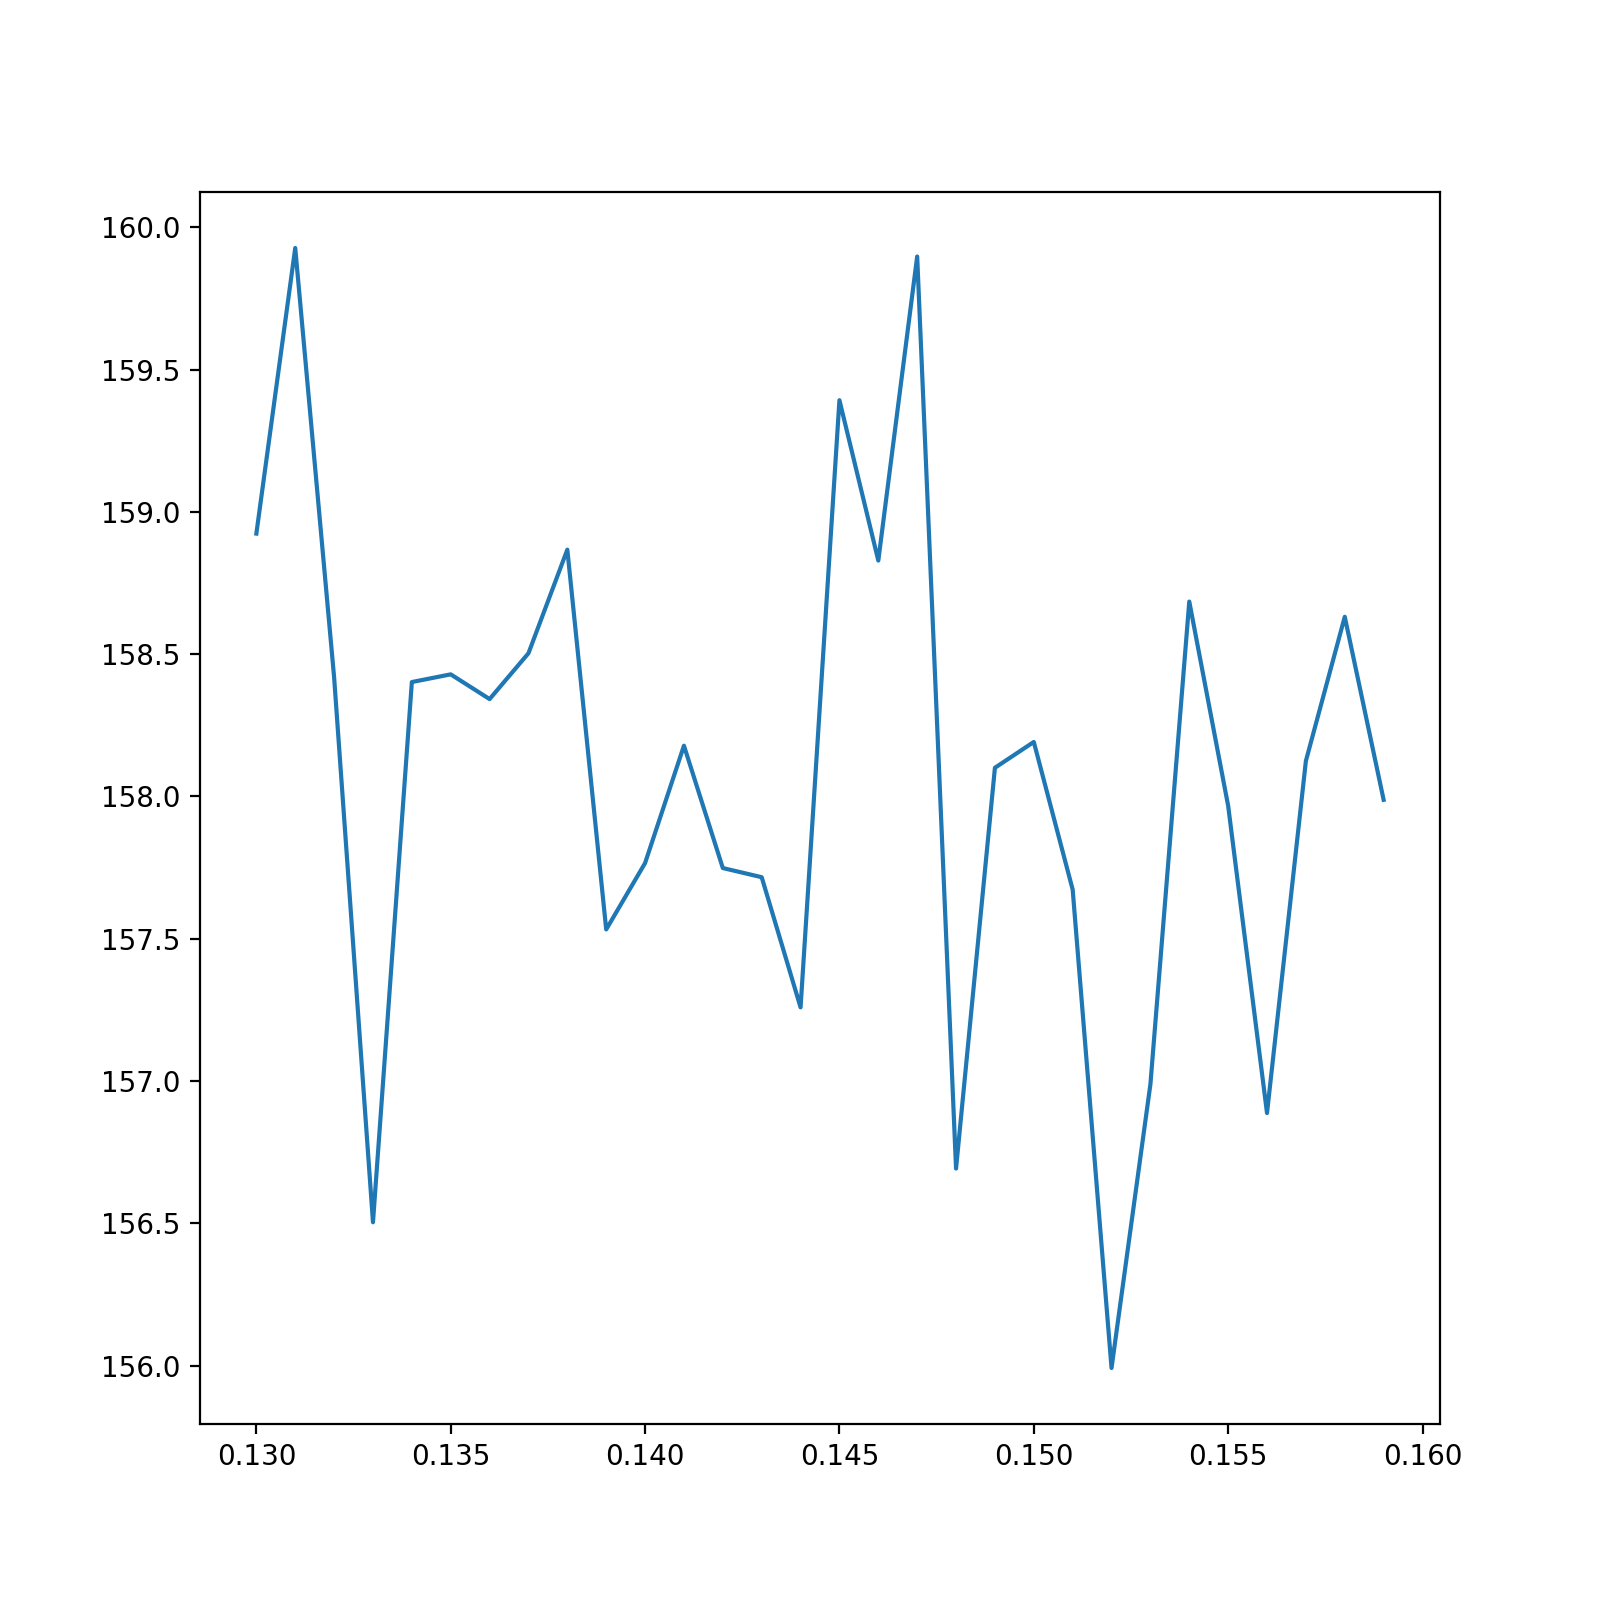

In [29]:
%matplotlib notebook
plt.figure(figsize=(4, 4))
plt.plot(mean_rewards[:, 0], mean_rewards[:, 1])

In [31]:
mean_rewards[np.where(mean_rewards[:, 1] == mean_rewards[:, 1].min())[0][0]]

array([1.52000000e-01, 1.55991767e+02])

<IPython.core.display.Javascript object>


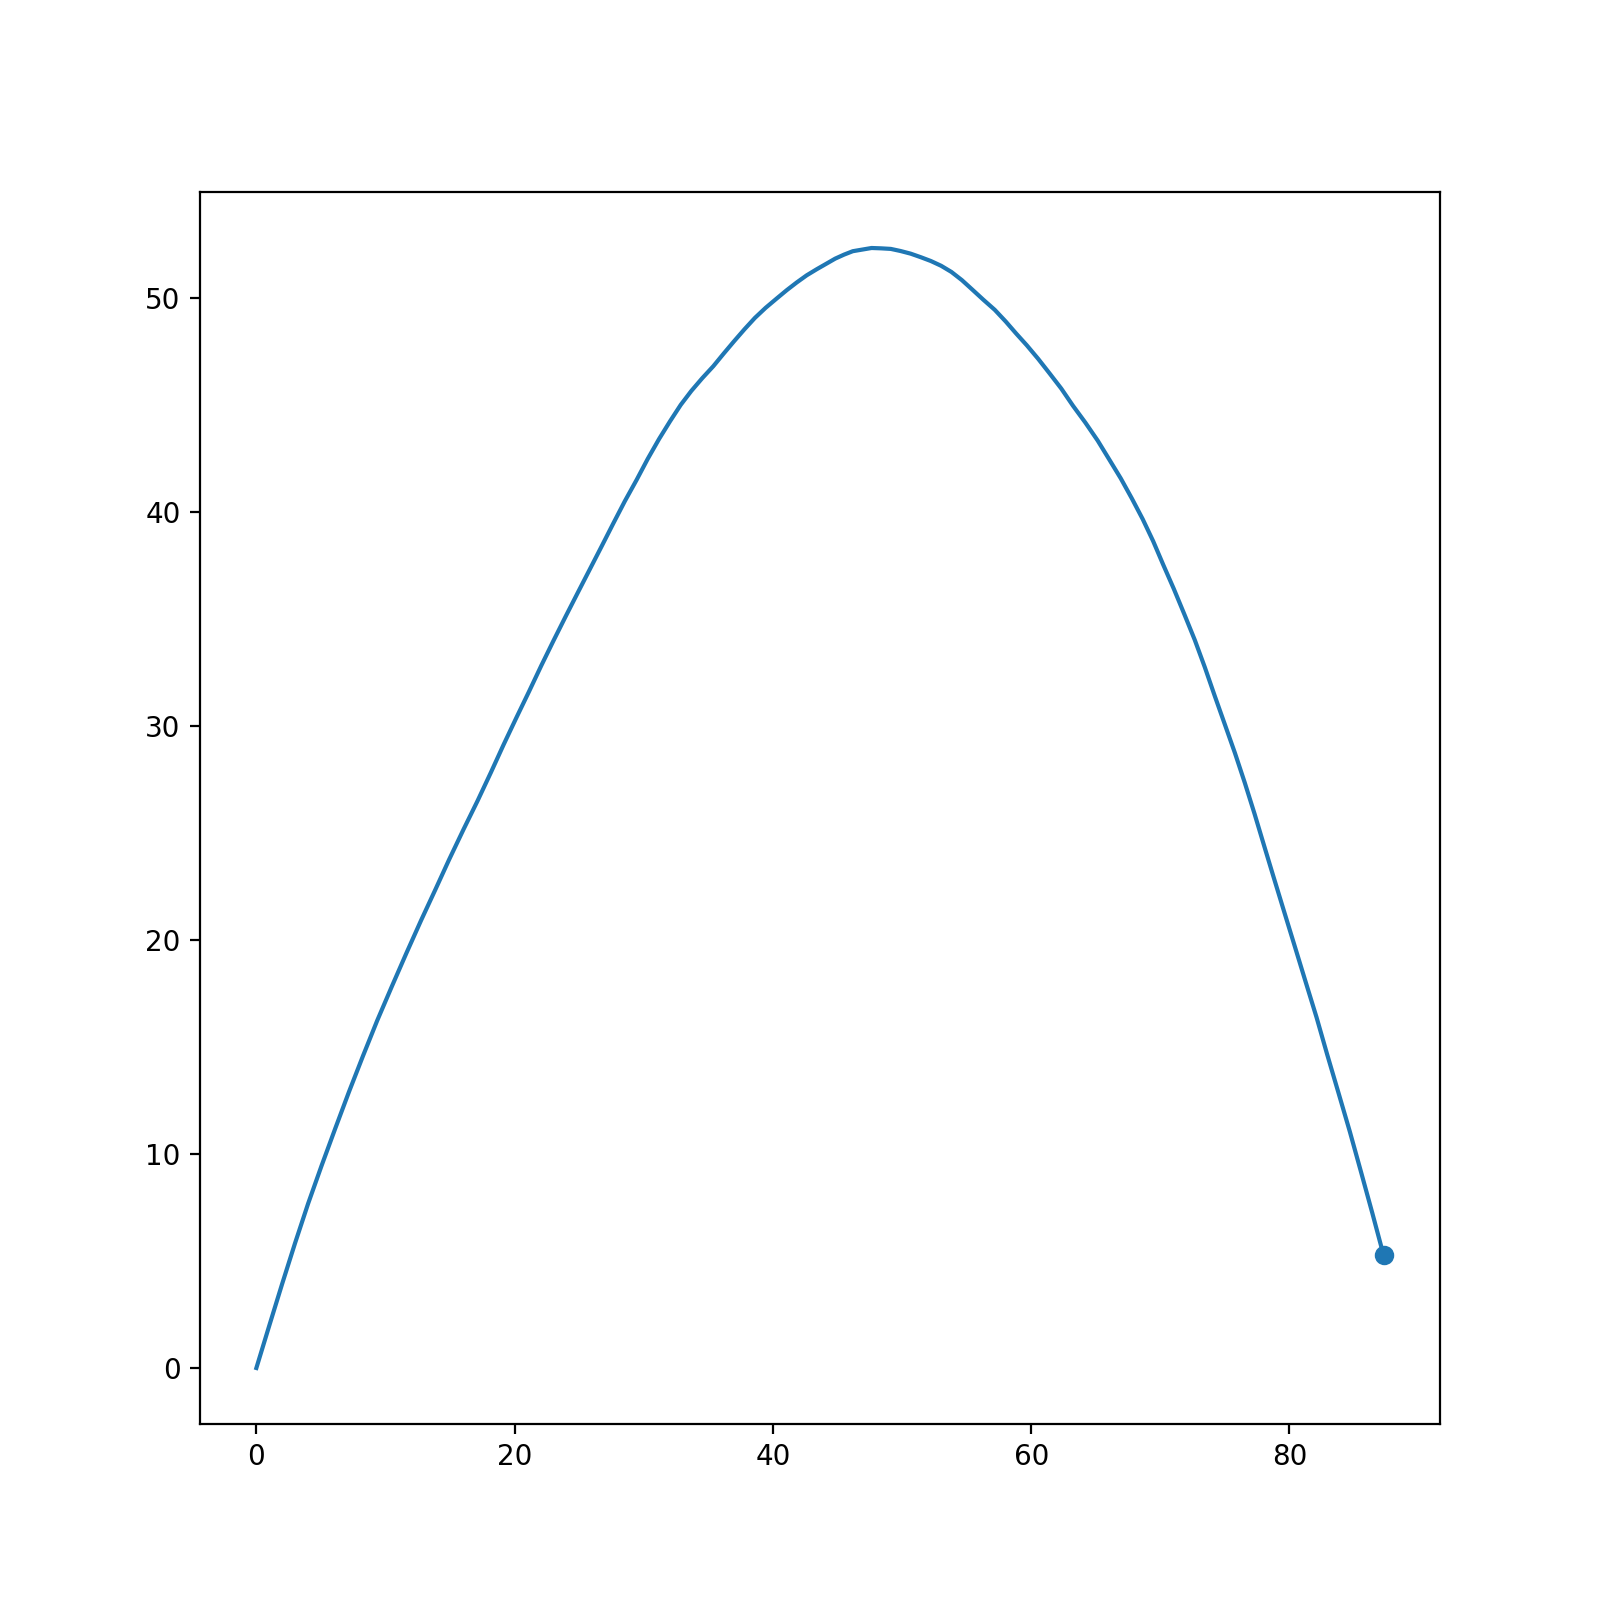

201.09340274921965

In [48]:
plt.figure(figsize=(4, 4))
test_coeff(0.0152)

In [38]:
def test_coeff2(coeff, coeff2, display=True):
    state = env.reset()
    for i in range(10):
        if i == 0:
            state, reward, done, _ = env.step(np.array([0., 0.]))
        elif i == 9:
            force = np.array([-(state[1] - meanx[i-1]) * coeff2 * stdx[i-1], 
                              -(state[2] - meany[i-1]) * coeff2 * stdy[i-1]])
            state, reward, done, _ = env.step(force)
        else:
            force = np.array([-(state[1] - meanx[i-1]) * coeff * stdx[i-1], 
                              -(state[2] - meany[i-1]) * coeff * stdy[i-1]])
            #print(force)
            state, reward, done, _ = env.step(force)
        #print(reward)
    if display:
        traj = np.array(env.trajectoire)
        plt.plot(traj[:, 1], traj[:, 2])
        plt.scatter(traj[-1][1], traj[-1][2])
        #print(traj[-10:])
    return reward

In [49]:
%%time
from tqdm.notebook import tqdm
mean_rewards = []
for l in tqdm(np.arange(0.13, 0.16, step=0.001)):
    coeff = l
    rewards = []
    for j in range(100):
        rewards.append(test_coeff2(0.0152, coeff, display=False))
    mean_rewards.append([l, np.mean(rewards)])
mean_rewards = np.array(mean_rewards)
np.where(mean_rewards[:, 1] == mean_rewards[:, 1].min())[0][0]


CPU times: user 6.43 s, sys: 120 ms, total: 6.55 s
Wall time: 6.37 s


9

<IPython.core.display.Javascript object>


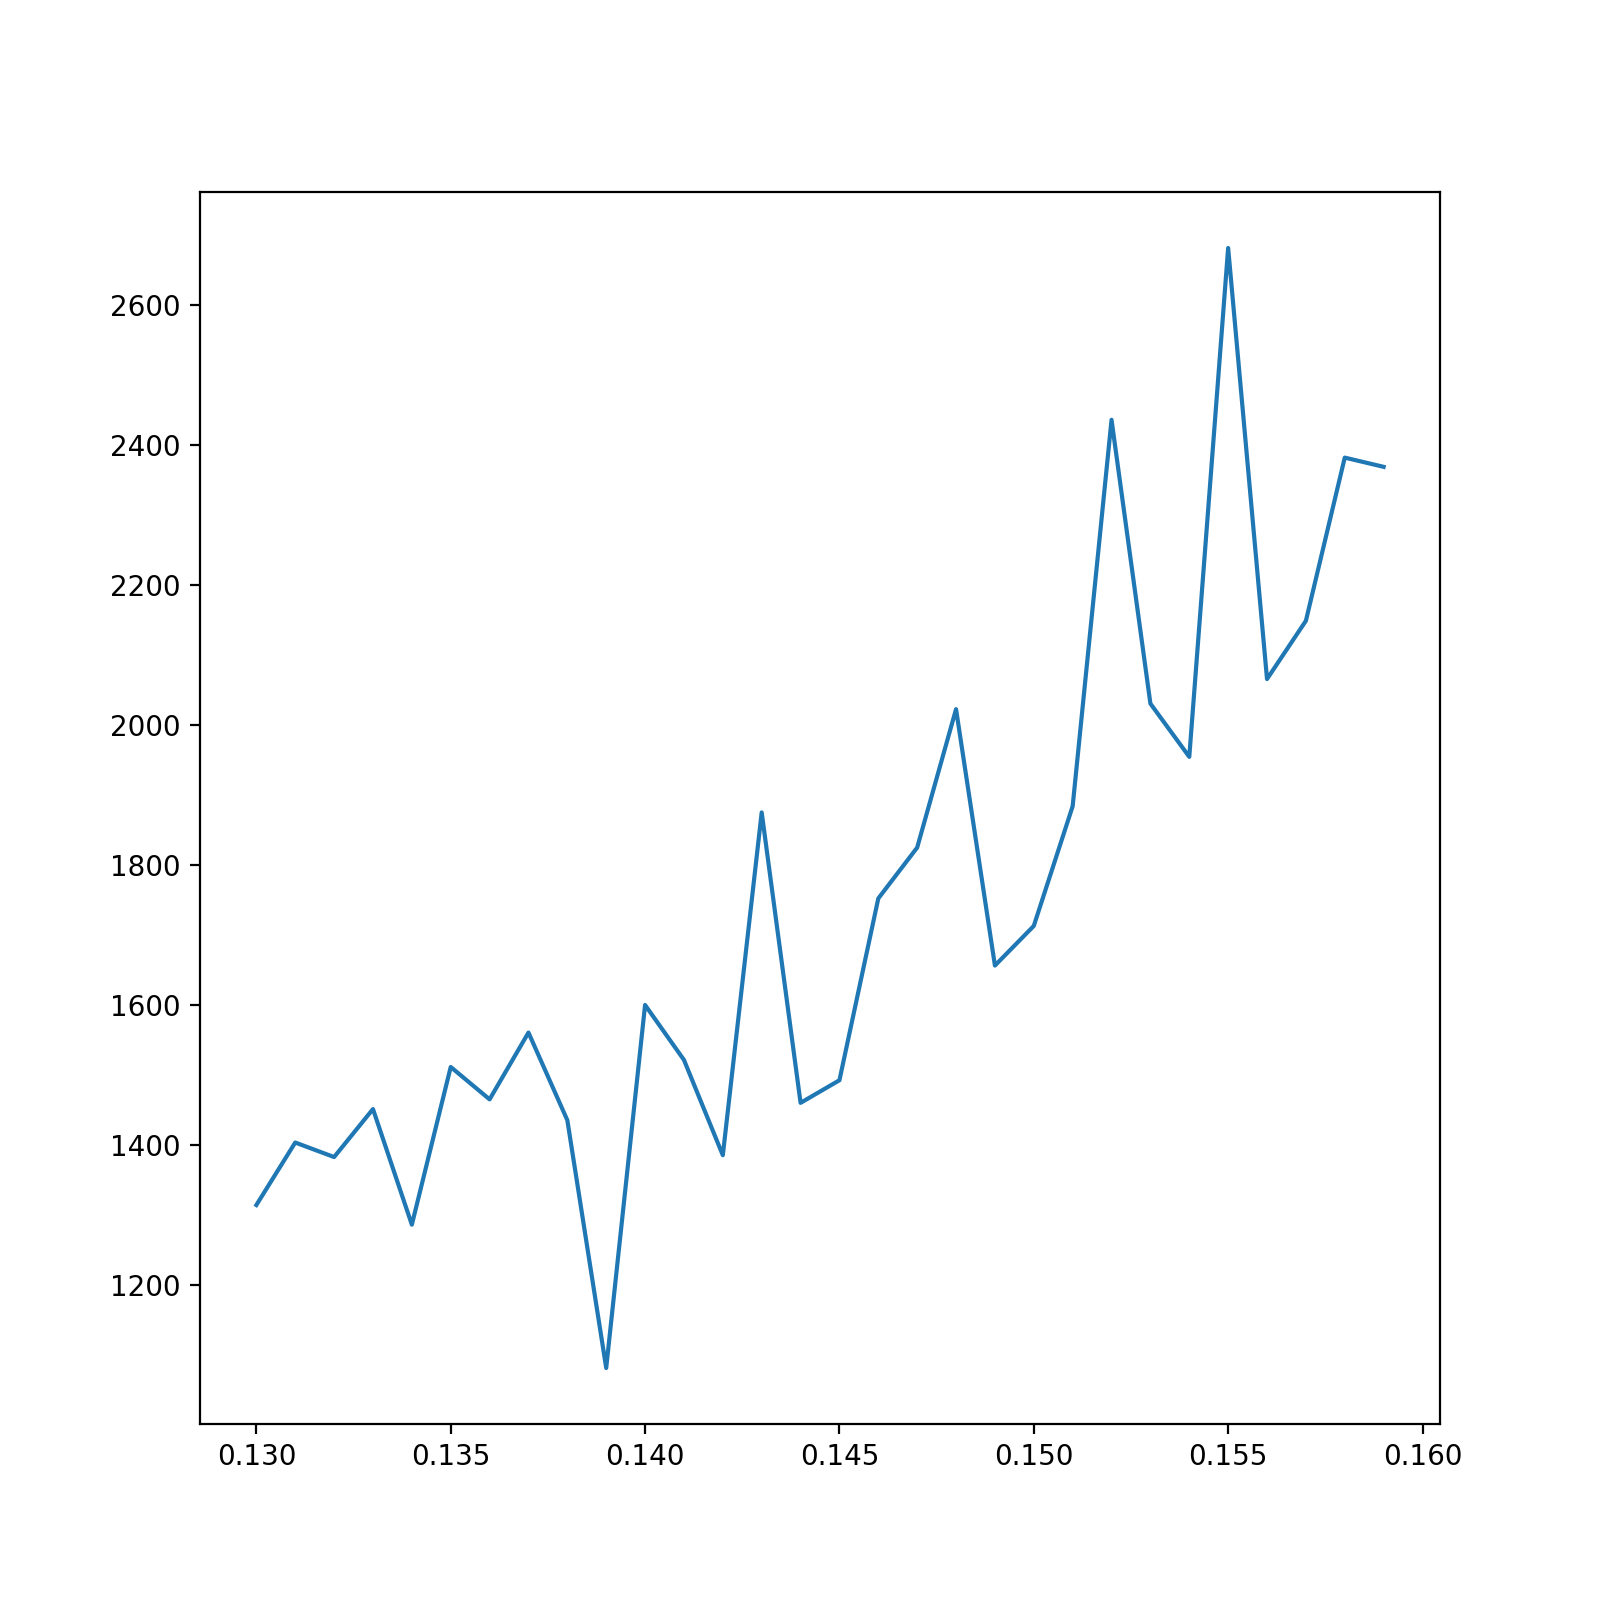

array([1.39000000e-01, 1.08180711e+03])

In [51]:
%matplotlib notebook
plt.figure(figsize=(4, 4))
plt.plot(mean_rewards[:, 0], mean_rewards[:, 1])
mean_rewards[np.where(mean_rewards[:, 1] == mean_rewards[:, 1].min())[0][0]]

<IPython.core.display.Javascript object>


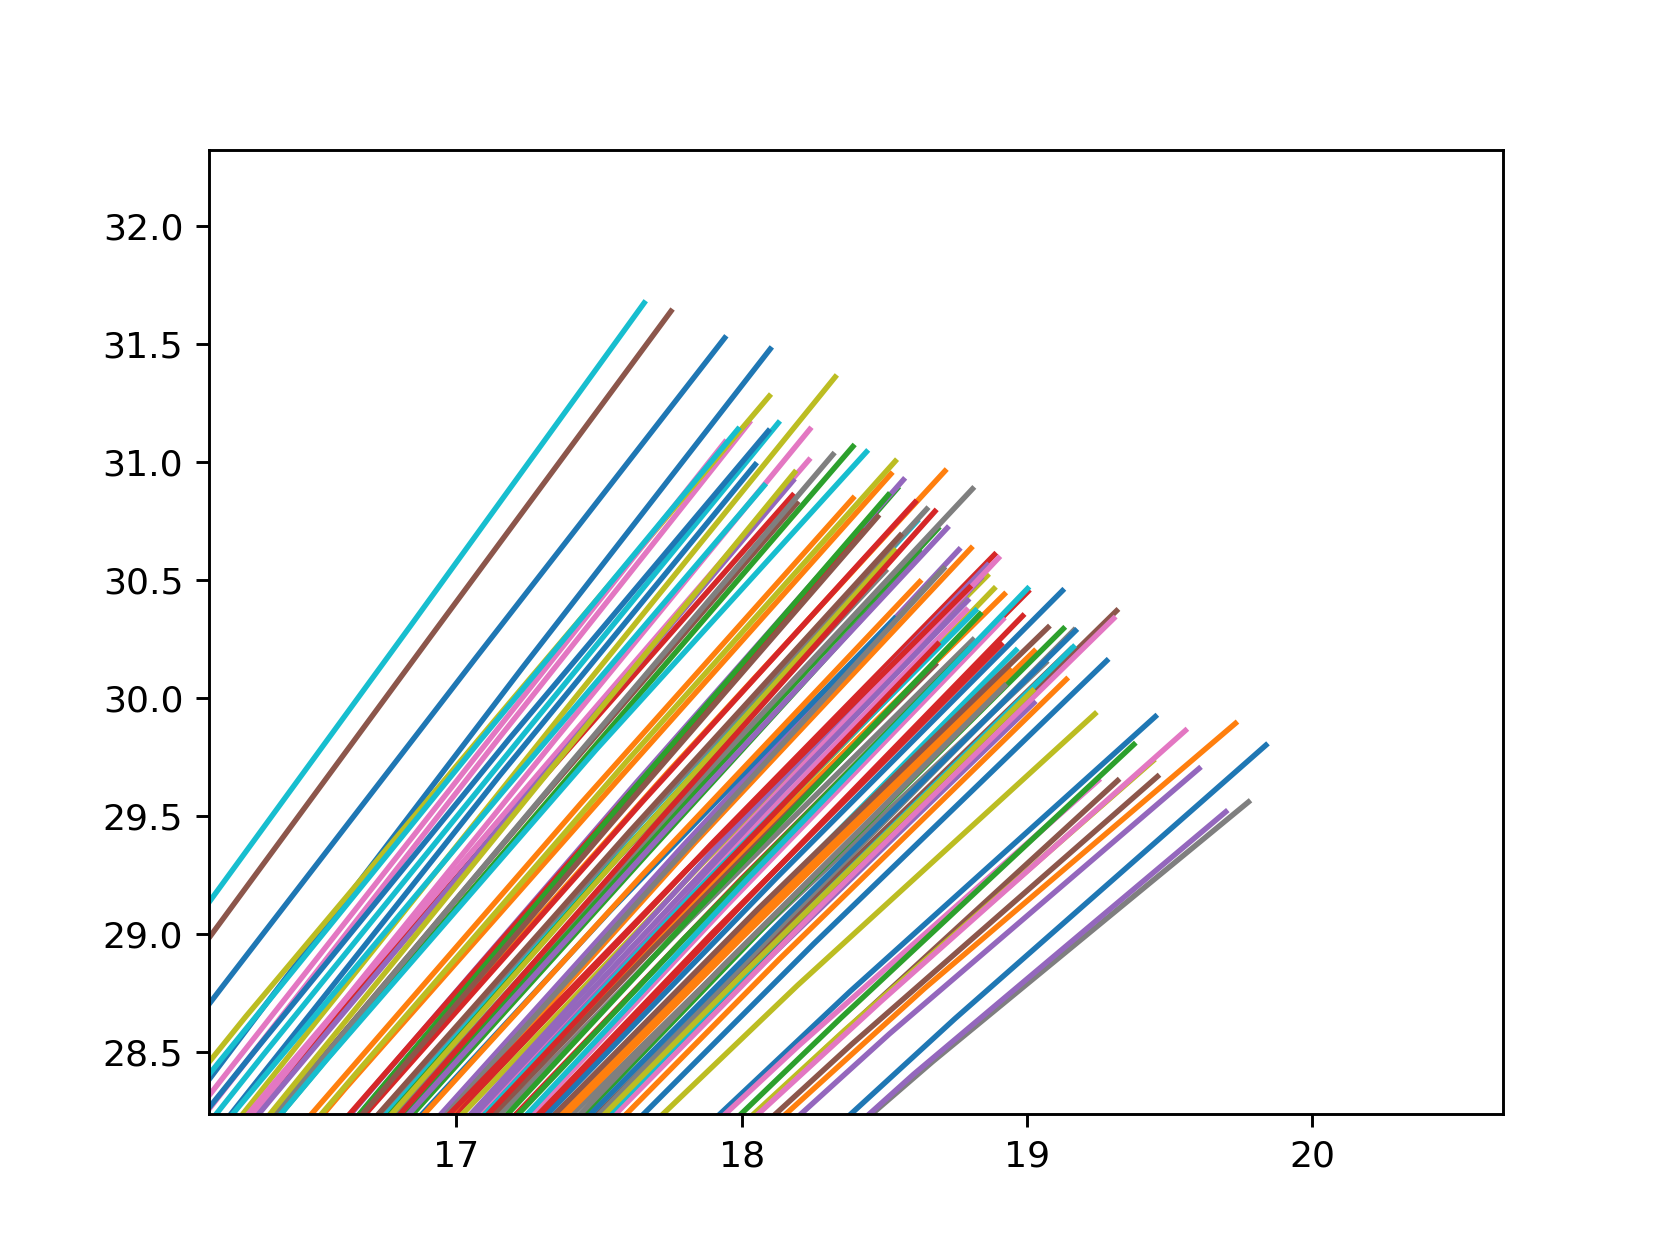

In [14]:
%matplotlib notebook
plt.figure()
start = 0
end = 20
for i in range(100):
    plt.plot(trajs[i][start:end, 1], trajs[i][start:end, 2])

$$
V_t = 0.2\int_{0}^{t}e^{(s-t)A}dW_s
$$

In [582]:
from scipy.linalg import expm
A = np.array([[0, 1], [1, 0]])
Deltat = 0.1
cov = 0.02 * A.dot(np.eye(2) - expm(-2*Deltat*A))
coeff = expm(-Deltat * A)

def init_vent():
    X = np.random.multivariate_normal(mean=np.zeros(shape=2), cov=cov, size=100)
    vent = np.zeros(shape=(100, 2))
    for i in range(1, 100):
        vent[i] = X[i-1] + np.matmul(coeff, vent[i-1])
    return vent

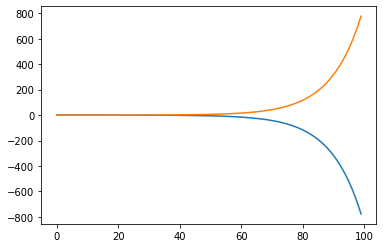

In [595]:
import matplotlib.pyplot as plt
vent = init_vent()
plt.plot(vent[:, 0])
plt.plot(vent[:, 1])